In [1]:
import gymnasium as gym
import highway_env
from utils import record_videos, show_videos
import pprint
import matplotlib.pyplot as plt
import numpy as np


/home/tinrafiq/.local/lib/python3.8/site-packages/gymnasium/utils/passive_env_checker.py:29: UserWarning: WARN: It seems a Box observation space is an image but the `dtype` is not `np.uint8`, actual type: float32. If the Box observation space is not an image, we recommend flattening the observation to have only a 1D vector.
  logger.warn(
/home/tinrafiq/.local/lib/python3.8/site-packages/gymnasium/utils/passive_env_checker.py:34: UserWarning: WARN: It seems a Box observation space is an image but the lower and upper bounds are not [0, 255]. Actual lower bound: -inf, upper bound: inf. Generally, CNN policies assume observations are within that range, so you may encounter an issue if the observation values are not.
  logger.warn(
/home/tinrafiq/.local/lib/python3.8/site-packages/gymnasium/utils/passive_env_checker.py:188: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/home/tinr

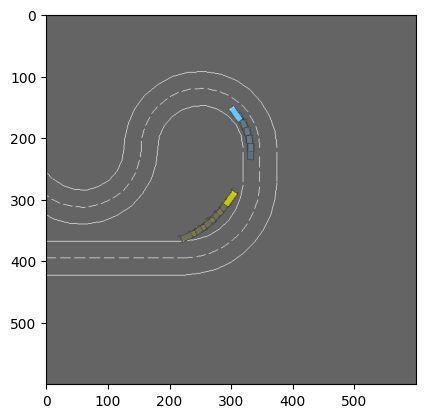

In [5]:
def convert_to(obs):
    return np.array(obs).ravel()

env = gym.make('racetrack-v0')
# env.close()
env.configure({
    "observation": {
        "type": "Kinematics",
        "vehicles_count": 0,
        "features": ["presence", "x", "y", 
                     "vx", "vy", "cos_h", "sin_h", 
                     "cos_d", "sin_d", "heading",
                     "long_off", "lat_off", "ang_off"],
    },
    "other_vehicles": 1,
    'show_trajectories': True,
     'offroad_terminal': True,
})

a= []
b= []
# pprint.pprint(env.config)
# print(env.observation_space)
(obs, info), done = env.reset(), False
a.append(obs)
b.append(info)
rew=[]

for i in range(15):
    obs, reward, done, truncated, info = env.step([-0.2])
    a.append(obs)
    b.append(info)
    rew.append(reward)
    if done:print("done")

plt.imshow(env.render())
plt.show()


In [7]:

print(b[13])


{'speed': 10.0, 'crashed': False, 'action': [-0.2], 'rewards': {'lane_centering_reward': 0.007827709966694659, 'action_reward': 0.2, 'collision_reward': False, 'on_road_reward': False}}
